### DataAnalyses

things that we need to add: 
From lecture 10 : 
- Common classification metrics include accuracy, precision, recall, and F1 score
- maybe make some confusion matrix 
- ROC-AUC Curve, it is done after the prediction 
- Precision-Recall curve 
- Probability density
- Cross-Validation : Technique used for assessing the performance and generalization of a predictive model.
From lecture 11 : 
- make different graphs for the KNN as in the screenshot 
Fromt lecture 12 : 
- Popular method: Classification and Regression Trees (CART), Breiman, Friedman, Olshen and Stone (1984). 
- we can add gradient boosting classifier 




some insights : 
- correlation of different features to the results 
- clarify why we have such results fr the graph 
- how each feature effect to the technique , very important to make general assumption 
- he asked about relatioships with feauture , with correlation 
- regression should not be too perfect 
- how is models misstrained 
- grid 
- retraining the model 
- confusion matrix for the prediction 
- the most impact while predictiong something 




## Libraries


In [47]:
# basics
import numpy as np
import pandas as pd 

# for plots
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler


# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, mean_absolute_error

In [48]:
# Dataset
df = pd.read_csv("DataSet/googleplaystore.csv")
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [49]:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
sns.set_style('darkgrid')

PALETTE = "Set3"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [51]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [52]:
print(df['Category'].nunique())

34


In [53]:
from sklearn.preprocessing import LabelEncoder

# Suppose you encoded 'Category'
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# To see the mapping:
print(list(le.classes_))

['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']


### Data preparing/cleaning 

In [54]:
# Проверим сколько значений стали NaN при попытке конвертации
price_before = df['Price'].copy()

# Попробуем привести к числам, а некорректные сделаем NaN
price_converted = pd.to_numeric(price_before, errors='coerce')

# Посчитаем сколько значений стали NaN
num_invalid = price_converted.isna().sum()
total = len(price_before)

print(f"Некорректных значений: {num_invalid} из {total} ({num_invalid / total * 100:.2f}%)")


# Удаляем строки, где пропущены важные поля
df = df.dropna(subset=['Rating', 'Installs', 'Type', 'Content Rating'])

# Остальное заполняем
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') #ревьюс в числа
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())# там где пропущенно ставлю медиану

df['Size'] = df['Size'].replace('Varies with device', np.nan) #эти мне не нравятся так что я убираю их чтобы потом заменить
#дальше тут работа с ценой

df['Price'] = df['Price'].fillna('0') # там где пропуски будет ноль

#функция чтобы преобразовать миллионы тысячи которы в буквах
def parse_size(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('k'):
            return float(size[:-1]) / 1024
    return np.nan

df['Size'] = df['Size'].apply(parse_size)
df['Size'] = df['Size'].fillna(df['Size'].median())  # заполняем медианой

df['Price'] = df['Price'].str.replace('$', '', regex=True) #нафиг знак доллара
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)#некорректные значения будут 00 и еще преобразует в числа



# Быстрый обзор
df.info()
df.describe()
df.head()

# Проверим сколько значений стали NaN при попытке конвертации
price_before = df['Price'].copy()

# Попробуем привести к числам, а некорректные сделаем NaN
price_converted = pd.to_numeric(price_before, errors='coerce')

#  сколько значений стали NaN
num_invalid = price_converted.isna().sum()
total = len(price_before)

print(f"Некорректных значений: {num_invalid} из {total} ({num_invalid / total * 100:.2f}%)")



Некорректных значений: 801 из 10841 (7.39%)
<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9366 non-null   object 
 1   Category          9366 non-null   object 
 2   Rating            9366 non-null   float64
 3   Reviews           9366 non-null   int64  
 4   Size              9366 non-null   float64
 5   Installs          9366 non-null   object 
 6   Type              9366 non-null   object 
 7   Price             9366 non-null   float64
 8   Content Rating    9366 non-null   object 
 9   Genres            9366 non-null   object 
 10  Last Updated      9366 non-null   object 
 11  Current Ver       9362 non-null   object 
 12  Android Ver       9364 non-null   object 
 13  Category_encoded  9366 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB
Некорректных значений: 0 из 9366 (0.00%

In [55]:
categoricals = ['Category', 'Type', 'Content Rating', 'Android Ver']
le = LabelEncoder()

for col in categoricals:
    df[col] = le.fit_transform(df[col].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9366 non-null   object 
 1   Category          9366 non-null   int64  
 2   Rating            9366 non-null   float64
 3   Reviews           9366 non-null   int64  
 4   Size              9366 non-null   float64
 5   Installs          9366 non-null   object 
 6   Type              9366 non-null   int64  
 7   Price             9366 non-null   float64
 8   Content Rating    9366 non-null   int64  
 9   Genres            9366 non-null   object 
 10  Last Updated      9366 non-null   object 
 11  Current Ver       9362 non-null   object 
 12  Android Ver       9366 non-null   int64  
 13  Category_encoded  9366 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 1.1+ MB


In [56]:
df['Genres'] = df['Genres'].astype(str).apply(lambda x: x.split(';')[0])
df['Genres'] = le.fit_transform(df['Genres'])
print(df['Genres'])
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
latest_date = df['Last Updated'].max()
df['Days Since Update'] = (latest_date - df['Last Updated']).dt.days
df.info()

0         3
1         3
2         3
3         3
4         3
         ..
10834    15
10836    15
10837    15
10839     7
10840    24
Name: Genres, Length: 9366, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9366 non-null   object        
 1   Category           9366 non-null   int64         
 2   Rating             9366 non-null   float64       
 3   Reviews            9366 non-null   int64         
 4   Size               9366 non-null   float64       
 5   Installs           9366 non-null   object        
 6   Type               9366 non-null   int64         
 7   Price              9366 non-null   float64       
 8   Content Rating     9366 non-null   int64         
 9   Genres             9366 non-null   int64         
 10  Last Updated       9366 non-null   datetime64[ns]
 11  Curr

In [57]:
# Step 1: Remove '+' and ',' characters
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)

# Step 2: Convert to numeric (float), coercing errors to NaN
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Step 3 (Optional but recommended): Drop or handle rows where 'Installs' couldn't be converted
df = df.dropna(subset=['Installs'])

# Step 4 (Optional): Cast to int if you're sure no decimals needed
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9366 non-null   object        
 1   Category           9366 non-null   int64         
 2   Rating             9366 non-null   float64       
 3   Reviews            9366 non-null   int64         
 4   Size               9366 non-null   float64       
 5   Installs           9366 non-null   int64         
 6   Type               9366 non-null   int64         
 7   Price              9366 non-null   float64       
 8   Content Rating     9366 non-null   int64         
 9   Genres             9366 non-null   int64         
 10  Last Updated       9366 non-null   datetime64[ns]
 11  Current Ver        9362 non-null   object        
 12  Android Ver        9366 non-null   int64         
 13  Category_encoded   9366 non-null   int64         
 14  Days Since U

In [58]:
print(df['Category'].nunique())

33


In [59]:
from sklearn.preprocessing import LabelEncoder

# Suppose you encoded 'Category'
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# To see the mapping:
print(list(le.classes_))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32)]


In [60]:


# столбец успешности
def get_success_level(installs):
    if installs <= 10000:
        return 'Not Successful'
    elif installs <= 100000:
        return 'Average'
    elif installs <= 1000000:
        return 'Above Average'
    else:
        return 'Successful'

df['Success_Level'] = df['Installs'].apply(get_success_level)

# Кодируем метки
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Success_Level_Encoded'] = le.fit_transform(df['Success_Level'])
#ненужное
df = df.drop(columns=['App', 'Last Updated', 'Current Ver', 'Days Since Update','Genres'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Category               9366 non-null   int64  
 1   Rating                 9366 non-null   float64
 2   Reviews                9366 non-null   int64  
 3   Size                   9366 non-null   float64
 4   Installs               9366 non-null   int64  
 5   Type                   9366 non-null   int64  
 6   Price                  9366 non-null   float64
 7   Content Rating         9366 non-null   int64  
 8   Android Ver            9366 non-null   int64  
 9   Category_encoded       9366 non-null   int64  
 10  Success_Level          9366 non-null   object 
 11  Success_Level_Encoded  9366 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 951.2+ KB


In [61]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Category_encoded,Success_Level,Success_Level_Encoded
0,0,4.1,159,19.0,10000,0,0.0,1,14,0,Not Successful,2
1,0,3.9,967,14.0,500000,0,0.0,1,14,0,Above Average,0
2,0,4.7,87510,8.7,5000000,0,0.0,1,14,0,Successful,3
3,0,4.5,215644,25.0,50000000,0,0.0,4,17,0,Successful,3
4,0,4.3,967,2.8,100000,0,0.0,1,19,0,Average,1


In [62]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Category_encoded', 'Success_Level',
       'Success_Level_Encoded'],
      dtype='object')

In [63]:
df["Success_Level_Encoded"].value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        0
2        3
3        3
4        1
        ..
10834    2
10836    2
10837    2
10839    2
10840    3
Name: Success_Level_Encoded, Length: 9366, dtype: int64>

In [64]:
print(df["Android Ver"].value_counts)

<bound method IndexOpsMixin.value_counts of 0        14
1        14
2        14
3        17
4        19
         ..
10834    16
10836    16
10837    16
10839    30
10840    30
Name: Android Ver, Length: 9366, dtype: int64>


In [65]:
print(df.columns)


Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Category_encoded', 'Success_Level',
       'Success_Level_Encoded'],
      dtype='object')


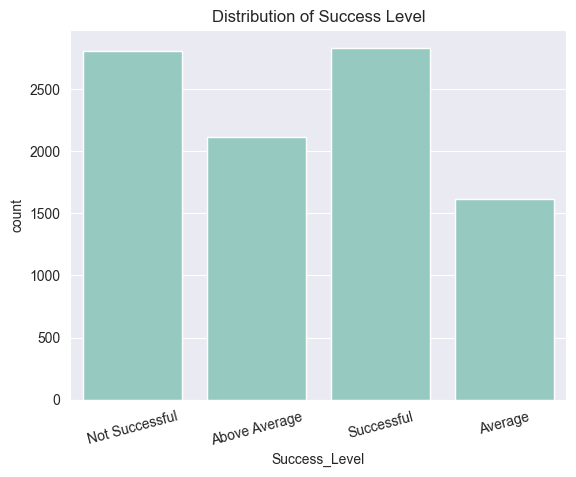

Success_Level_Encoded
3    2832
2    2802
0    2115
1    1617
Name: count, dtype: int64

In [66]:
sns.countplot(data=df, x='Success_Level')
plt.title('Distribution of Success Level')
plt.xticks(rotation=15)
plt.show()

df['Success_Level'].value_counts()
df['Success_Level_Encoded'].value_counts()

In [67]:
print(df[['Success_Level', 'Success_Level_Encoded']].head())
print(df['Success_Level'].value_counts())
print(df['Success_Level_Encoded'].value_counts())


    Success_Level  Success_Level_Encoded
0  Not Successful                      2
1   Above Average                      0
2      Successful                      3
3      Successful                      3
4         Average                      1
Success_Level
Successful        2832
Not Successful    2802
Above Average     2115
Average           1617
Name: count, dtype: int64
Success_Level_Encoded
3    2832
2    2802
0    2115
1    1617
Name: count, dtype: int64


# Data analyses 

# Techniques usage

### Linear regression


In [68]:
#Integer encoding
feature_cols = ['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Android Ver']

X = df[feature_cols]
y = df["Success_Level_Encoded"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Random forest

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.8639274279615795


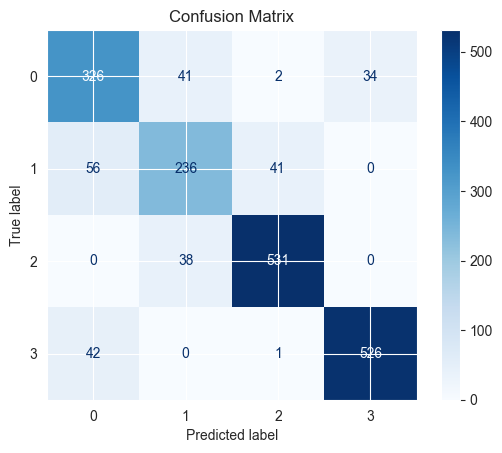

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


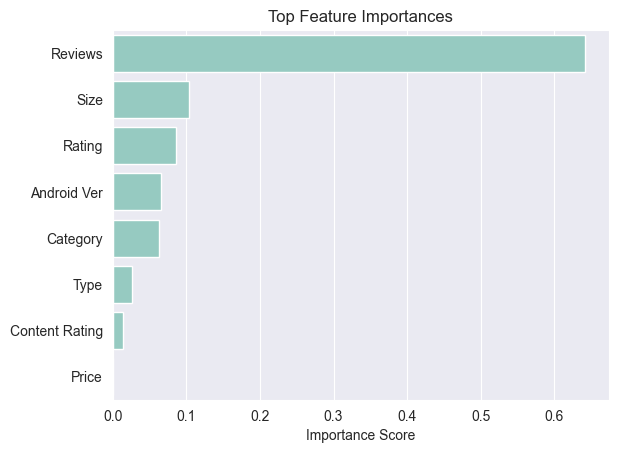

In [71]:


# If you have feature names:
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
importances = clf.feature_importances_

# Plot top N features
top_n = 10
indices = np.argsort(importances)[::-1][:top_n]
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.show()


🎯 Random Forest Accuracy: 0.29882604055496265

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.18      0.21       422
           1       0.19      0.06      0.09       321
           2       0.30      0.40      0.34       556
           3       0.33      0.43      0.37       575

    accuracy                           0.30      1874
   macro avg       0.27      0.27      0.25      1874
weighted avg       0.28      0.30      0.28      1874



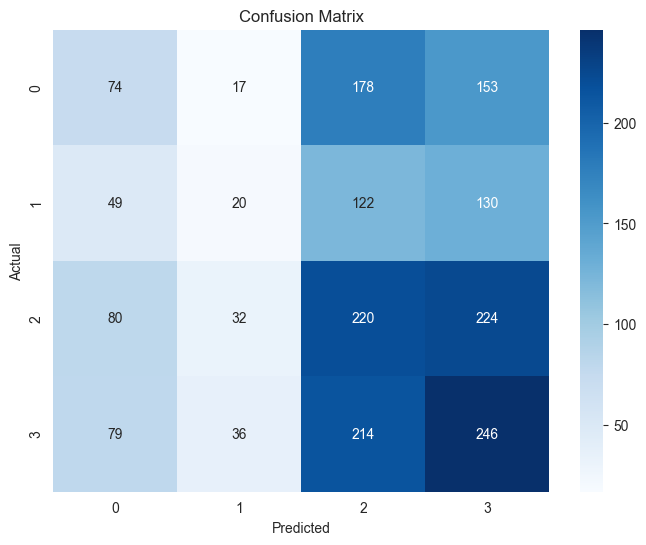

In [72]:
np.random.seed(42)

# Generate synthetic dataset (use your real one here)
data = {
    'Category_encoded': np.random.rand(9366),
    'Rating': np.random.rand(9366),
    'Reviews': np.random.rand(9366),
    'Size': np.random.rand(9366),
    'Installs': np.random.rand(9366),
    'Price': np.random.rand(9366),
    'Success_Level_Encoded': np.random.choice([0, 1, 2, 3], 9366, p=[0.2258, 0.1726, 0.2993, 0.3023])
}

df = pd.DataFrame(data)

feature_cols = ['Category_encoded', 'Rating', 'Reviews', 'Size', 'Installs', 'Price']
target_col = 'Success_Level_Encoded'

X = df[feature_cols]
y = df[target_col]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# Step 2: Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# Step 3: Train Random Forest
# ---------------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# ---------------------------
# Step 4: Evaluate
# ---------------------------
y_pred = clf.predict(X_test)

print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

for name, model in models.items():
    print(f"__________ {name} __________")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error: {mse:.4f}\n")

__________ Linear Regression __________
Mean Squared Error: {mse:.4f}

__________ Decision Tree __________
Mean Squared Error: {mse:.4f}

__________ Random Forest __________
Mean Squared Error: {mse:.4f}

__________ Support Vector Regressor __________
Mean Squared Error: {mse:.4f}

__________ K-Neighbors Regressor __________
Mean Squared Error: {mse:.4f}



In [74]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")


residuals = y_test - predictions

Mean Squared Error (MSE): 1.3083
Root Mean Squared Error (RMSE): 1.1438


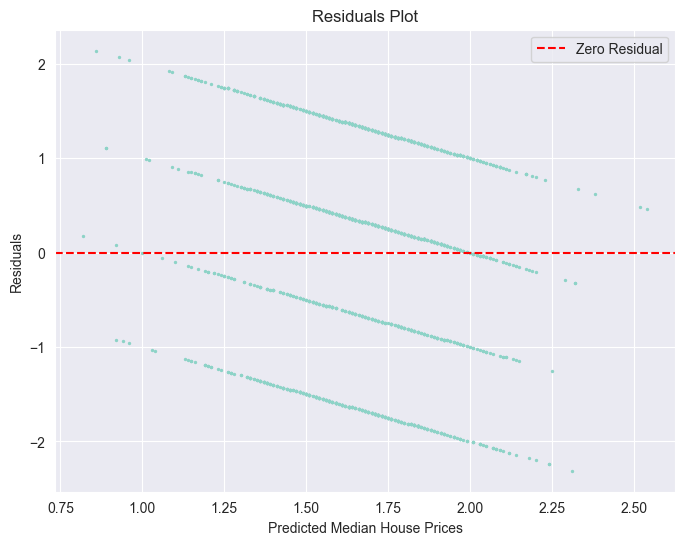

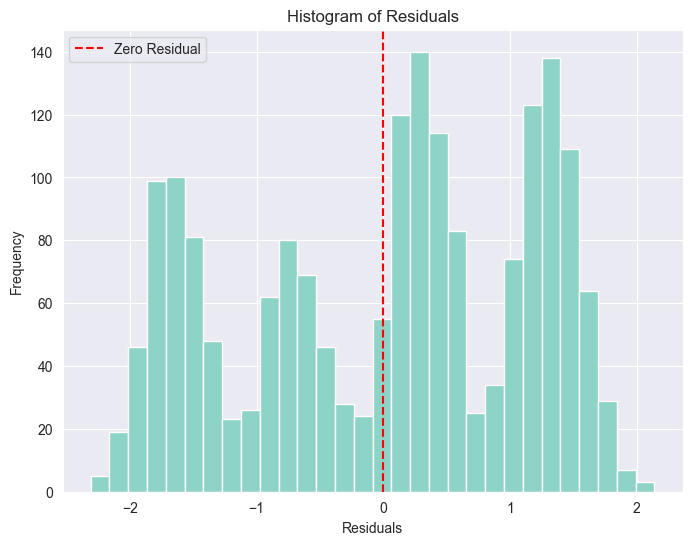

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions, 
            residuals, 
            s=2)
plt.axhline(y=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residuals Plot")
plt.xlabel("Predicted Median House Prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [76]:
df.head()

,Category_encoded,Rating,Reviews,Size,Installs,Price,Success_Level_Encoded
0,0.374540,0.531331,0.616202,0.575813,0.153635,0.083067,0
1,0.950714,0.805581,0.928176,0.372577,0.639493,0.726120,2
2,0.731994,0.791353,0.500062,0.140560,0.042622,0.843867,0
3,0.598658,0.581367,0.889036,0.534854,0.379102,0.405834,3
4,0.156019,0.780785,0.454065,0.387012,0.807664,0.356827,3
